In [1]:
import time

In [2]:
import pandas as pd 
import keras
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

In [7]:
import seaborn as sn

In [8]:
df_train=pd.read_csv(r"C:\Users\91811\Desktop\sales_train.csv")


In [9]:
from datetime import date


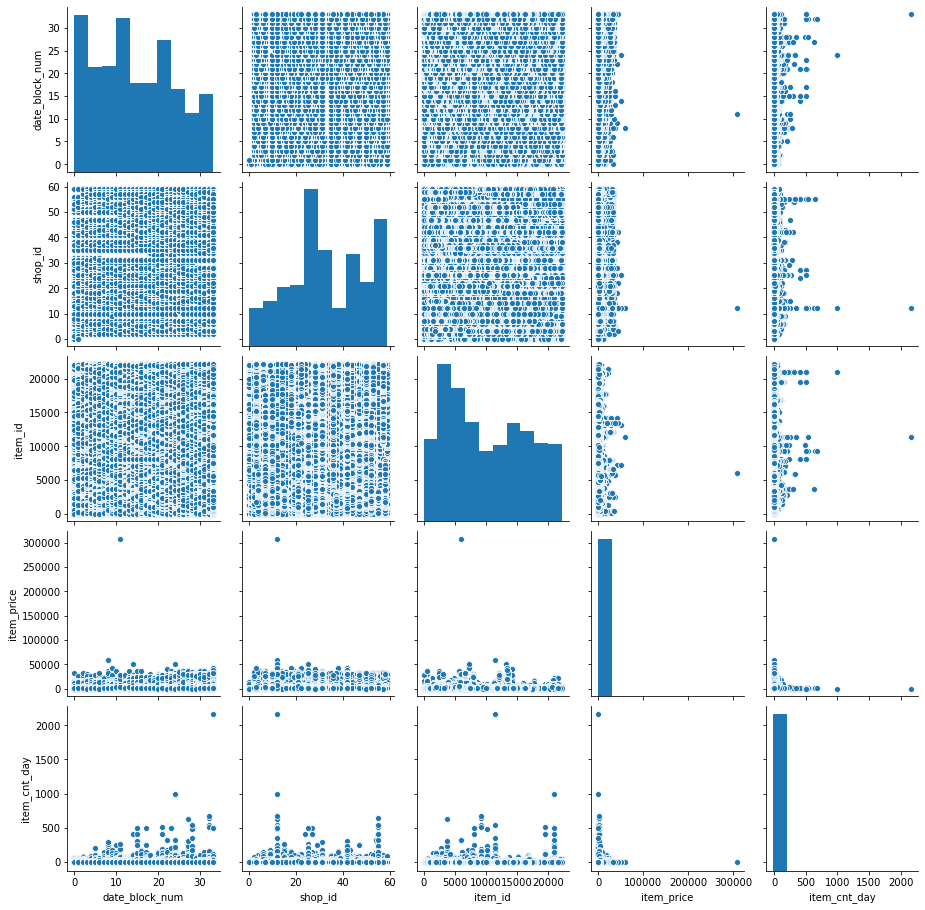

In [11]:
sn.pairplot(df_train)

In [5]:
df_train=df_train[df_train.item_price<100000]

In [6]:
df_train=df_train[df_train.item_cnt_day<800]

In [7]:
df_train=df_train[df_train.item_cnt_day>=0]

In [8]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [9]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


sn.pairplot(df_train)

In [10]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [11]:
df_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [12]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [13]:
df_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [14]:
df_train['year'] = pd.to_datetime(df_train['date'], format= '%d.%m.%Y' )
df_train.dtypes

date                      object
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
year              datetime64[ns]
dtype: object

In [15]:
year=pd.DataFrame({"year":df_train['year'].dt.year})

In [16]:
year

,year
0,2013
1,2013
3,2013
4,2013
5,2013
...,...
2935844,2015
2935845,2015
2935846,2015
2935847,2015


In [17]:
day=pd.DataFrame({"date":df_train['year'].dt.day})

In [18]:
day

,date
0,2
1,3
3,6
4,15
5,10
...,...
2935844,10
2935845,9
2935846,14
2935847,22


In [19]:
df_train['item_cnt_day'].value_counts()

1.0      2629371
2.0       194201
3.0        47350
4.0        19685
5.0        10474
          ...   
96.0           1
95.0           1
179.0          1
194.0          1
508.0          1
Name: item_cnt_day, Length: 187, dtype: int64

In [20]:
df_train=df_train.drop(['year'],axis=1)

In [21]:
train_set=pd.concat([year,df_train],axis=1)

In [22]:
train_set

,year,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013,02.01.2013,0,59,22154,999.00,1.0
1,2013,03.01.2013,0,25,2552,899.00,1.0
3,2013,06.01.2013,0,25,2554,1709.05,1.0
4,2013,15.01.2013,0,25,2555,1099.00,1.0
5,2013,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...,...
2935844,2015,10.10.2015,33,25,7409,299.00,1.0
2935845,2015,09.10.2015,33,25,7460,299.00,1.0
2935846,2015,14.10.2015,33,25,7459,349.00,1.0
2935847,2015,22.10.2015,33,25,7440,299.00,1.0


In [23]:
train_set['month'] = (train_set.date_block_num % 12)

In [24]:

month_lengths = pd.DataFrame({'month': range(0,12),
                              'month_length': [31,28,31,30,31,30,31,31,30,31,30,31]
})

# merge the month_lengths into the train_set data using the month feature
train_set = train_set.merge(month_lengths, on='month', how='left')
train_set['month_length'] = train_set.month_length

In [25]:
train_set['revenue'] = train_set.item_cnt_day * train_set.item_price

In [26]:
train_set

,year,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,month_length,revenue
0,2013,02.01.2013,0,59,22154,999.00,1.0,0,31,999.00
1,2013,03.01.2013,0,25,2552,899.00,1.0,0,31,899.00
2,2013,06.01.2013,0,25,2554,1709.05,1.0,0,31,1709.05
3,2013,15.01.2013,0,25,2555,1099.00,1.0,0,31,1099.00
4,2013,10.01.2013,0,25,2564,349.00,1.0,0,31,349.00
...,...,...,...,...,...,...,...,...,...,...
2928485,2015,10.10.2015,33,25,7409,299.00,1.0,9,31,299.00
2928486,2015,09.10.2015,33,25,7460,299.00,1.0,9,31,299.00
2928487,2015,14.10.2015,33,25,7459,349.00,1.0,9,31,349.00
2928488,2015,22.10.2015,33,25,7440,299.00,1.0,9,31,299.00


# importing shops dataset

In [27]:
shops=pd.read_csv(r"C:\Users\Prateek\Desktop\shops.csv")


In [28]:
shops.head(20)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [29]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [30]:
for i in range(len(shops)):
    shops.loc[i,'city']=shops.loc[i].shop_name.split(" ")[0]
    shops.loc[i,'category']=shops.loc[i].shop_name.split(" ")[1]

In [31]:
shops.head()

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [32]:
shops['city'].value_counts()

Москва              13
Воронеж              3
Тюмень               3
РостовНаДону         3
СПб                  2
Якутск               2
Самара               2
Казань               2
Н.Новгород           2
!Якутск              2
Новосибирск          2
Жуковский            2
Уфа                  2
Красноярск           2
Адыгея               1
Коломна              1
Химки                1
Курск                1
Сургут               1
Выездная             1
Омск                 1
Томск                1
Калуга               1
Сергиев              1
Волжский             1
Мытищи               1
Интернет-магазин     1
Ярославль            1
Балашиха             1
Цифровой             1
Вологда              1
Чехов                1
Name: city, dtype: int64

In [33]:
shops['city']=shops['city'].replace({'!Якутск':'Якутск'})

In [34]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [35]:
shops.shape

(60, 4)

In [36]:
shops

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,ТРЦ
6,"Воронеж (Плехановская, 13)",6,Воронеж,"(Плехановская,"
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,ТРЦ
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,ТРЦ
9,Выездная Торговля,9,Выездная,Торговля


In [37]:
# so (0,57),(1,58),(10,11),(category 44 is wrong)
# so we have to remove shop id 57,58,11 and change category 46 to ТЦ
shops.iloc[46,3].replace('Посад','ТЦ')

'ТЦ'

In [38]:
shops

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,ТРЦ
6,"Воронеж (Плехановская, 13)",6,Воронеж,"(Плехановская,"
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,ТРЦ
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,ТРЦ
9,Выездная Торговля,9,Выездная,Торговля


In [39]:
shops=shops.drop(index=57)
shops=shops.drop(index=58)
shops=shops.drop(index=11)

In [40]:
shops.shape

(57, 4)

In [41]:
shops

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,ТРЦ
6,"Воронеж (Плехановская, 13)",6,Воронеж,"(Плехановская,"
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,ТРЦ
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,ТРЦ
9,Выездная Торговля,9,Выездная,Торговля


In [42]:
#now we have to replace these shop id's in train dataset
df_train['shop_id']=df_train['shop_id'].replace(58,0)
df_train['shop_id']=df_train['shop_id'].replace(59,1)
df_train['shop_id']=df_train['shop_id'].replace(11,10)
df_train['shop_id'].value_counts()

31    235185
25    185788
54    143124
28    142018
57    117114
42    109002
27    105209
6      82402
0      81125
56     69378
46     66219
50     65043
19     63700
15     59381
35     58317
21     58008
7      57977
47     56502
26     53776
18     53095
24     52929
53     52758
16     52595
30     50725
29     49074
1      47649
38     45851
22     45337
51     44433
52     43359
41     41885
37     39484
44     39365
43     39071
4      38118
5      38094
14     36859
45     35788
55     34767
12     34261
2      25911
3      25413
17     22870
10     21896
48     21523
13     17824
49     15807
39     13403
32      7913
23      6946
34      5727
33      5005
40      4244
9       3743
8       3406
20      1791
36       303
Name: shop_id, dtype: int64

In [43]:
shops['city_id'] = shops.city.astype('category').cat.codes
shops['category_id'] = shops.category.astype('category').cat.codes


In [44]:
shops.head()

,shop_name,shop_id,city,category,city_id,category_id
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,",29,4
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ,29,9
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ,0,9
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК,1,7
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ,2,9


In [45]:
shops_merge=shops.iloc[:,[1,4,5]]
shops_merge

,shop_id,city_id,category_id
0,0,29,4
1,1,29,9
2,2,0,9
3,3,1,7
4,4,2,9
5,5,3,8
6,6,4,1
7,7,4,8
8,8,4,8
9,9,5,10


# item categories

In [46]:
item_category=pd.read_csv(r"C:\Users\Prateek\Desktop\item_categories.csv")

In [47]:
item_category.head(30)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [48]:
item_category['item_category_name'].value_counts()

Книги - Аудиокниги (Цифра)       1
Подарки - Сертификаты, услуги    1
Кино - Коллекционное             1
Музыка - Музыкальное видео       1
Аксессуары - PSVita              1
                                ..
Книги - Аудиокниги               1
Подарки - Развитие               1
Игры - PS3                       1
Музыка - MP3                     1
Доставка товара                  1
Name: item_category_name, Length: 84, dtype: int64

In [49]:
item_category['categoryy'] = ""
item_category['name'] = ""

for i in item_category.index:
    cat_name = item_category.loc[i].item_category_name.split(' - ')
    if len(cat_name) == 2:
        item_category.loc[i, 'categoryy'] = cat_name[0]
        item_category.loc[i, 'name'] = cat_name[1]

In [50]:
item_category

,item_category_name,item_category_id,categoryy,name
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP
...,...,...,...,...
79,Служебные,79,,
80,Служебные - Билеты,80,Служебные,Билеты
81,Чистые носители (шпиль),81,,
82,Чистые носители (штучные),82,,


In [51]:
blank = (item_category.categoryy == "") | (item_category.name == "")
item_category[blank]

,item_category_name,item_category_id,categoryy,name
8,Билеты (Цифра),8,,
9,Доставка товара,9,,
32,"Карты оплаты (Кино, Музыка, Игры)",32,,
79,Служебные,79,,
81,Чистые носители (шпиль),81,,
82,Чистые носители (штучные),82,,
83,Элементы питания,83,,


In [52]:
#we could just fill these subcategory
item_category.loc[81:82, 'categoryy'] = 'носители'
item_category.loc[81, 'name'] = 'шпиль'
item_category.loc[82, 'name'] = 'штучные'
item_category.loc[32, 'categoryy'] = 'Карты оплаты '
item_category.loc[32, 'name'] = 'Кино, Музыка, Игры'
item_category.loc[8, 'categoryy'] = 'Билеты'
item_category.loc[8, 'name'] = 'Цифра'
item_category.loc[9, 'categoryy'] = 'Доставка'
item_category.loc[9, 'name'] = 'товара'
item_category.loc[79, 'categoryy'] = 'Служебные'
item_category.loc[79, 'name'] = 'Служебные'
item_category.loc[83, 'categoryy'] = 'Элементы '
item_category.loc[83, 'name'] = 'питания'

In [53]:
item_category

,item_category_name,item_category_id,categoryy,name
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP
...,...,...,...,...
79,Служебные,79,Служебные,Служебные
80,Служебные - Билеты,80,Служебные,Билеты
81,Чистые носители (шпиль),81,носители,шпиль
82,Чистые носители (штучные),82,носители,штучные


for feature in ['category_items', 'name']:
    item_category[feature + '_id'] = (
        item_category[feature].astype('category').cat.codes
    )

In [54]:
item_category['category_items_id'] = item_category.categoryy.astype('category').cat.codes
item_category['name_id'] = item_category.name.astype('category').cat.codes

In [55]:
item_category

,item_category_name,item_category_id,categoryy,name,category_items_id,name_id
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники,0,30
1,Аксессуары - PS2,1,Аксессуары,PS2,1,11
2,Аксессуары - PS3,2,Аксессуары,PS3,1,12
3,Аксессуары - PS4,3,Аксессуары,PS4,1,13
4,Аксессуары - PSP,4,Аксессуары,PSP,1,15
...,...,...,...,...,...,...
79,Служебные,79,Служебные,Служебные,16,54
80,Служебные - Билеты,80,Служебные,Билеты,16,27
81,Чистые носители (шпиль),81,носители,шпиль,18,64
82,Чистые носители (штучные),82,носители,штучные,18,65


In [56]:
item=pd.read_csv(r"C:\Users\Prateek\Desktop\items.csv")

In [57]:
# merging item and item_category
item_cat=pd.merge(item,item_category,on='item_category_id')

In [58]:
item_cat

,item_name,item_id,item_category_id,item_category_name,categoryy,name,category_items_id,name_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,DVD,11,6
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,DVD,11,6
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,DVD,11,6
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,DVD,11,6
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD,Кино,DVD,11,6
...,...,...,...,...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания,Элементы,питания,17,62
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания,Элементы,питания,17,62
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания,Элементы,питания,17,62
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания,Элементы,питания,17,62


In [59]:
item_merge=item_cat.iloc[:,[1,2,6,7]]
item_merge

,item_id,item_category_id,category_items_id,name_id
0,0,40,11,6
1,2,40,11,6
2,3,40,11,6
3,4,40,11,6
4,5,40,11,6
...,...,...,...,...
22165,22095,83,17,62
22166,22096,83,17,62
22167,22097,83,17,62
22168,22098,83,17,62


# test

In [60]:
# now importing test data
test=pd.read_csv(r"C:\Users\Prateek\Desktop\test.csv")

In [61]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [62]:
train_set

,year,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,month_length,revenue
0,2013,02.01.2013,0,59,22154,999.00,1.0,0,31,999.00
1,2013,03.01.2013,0,25,2552,899.00,1.0,0,31,899.00
2,2013,06.01.2013,0,25,2554,1709.05,1.0,0,31,1709.05
3,2013,15.01.2013,0,25,2555,1099.00,1.0,0,31,1099.00
4,2013,10.01.2013,0,25,2564,349.00,1.0,0,31,349.00
...,...,...,...,...,...,...,...,...,...,...
2928485,2015,10.10.2015,33,25,7409,299.00,1.0,9,31,299.00
2928486,2015,09.10.2015,33,25,7460,299.00,1.0,9,31,299.00
2928487,2015,14.10.2015,33,25,7459,349.00,1.0,9,31,349.00
2928488,2015,22.10.2015,33,25,7440,299.00,1.0,9,31,299.00


In [63]:
train_data = []

for month in range(34):
    month_data = train_set[train_set.date_block_num == month]
    train_data += ([[month, shop, item] 
                      for shop in month_data.shop_id.unique() 
                      for item in month_data.item_id.unique()])
    
date_shop_item = ['date_block_num', 'shop_id', 'item_id']
train_data = pd.DataFrame(train_data, columns=date_shop_item)

train_data.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [64]:
train_data['date_block_num'].value_counts()

5     389804
11    389712
6     386584
2     381800
1     375636
4     375165
9     369748
3     366300
0     364950
10    363780
7     361035
8     354330
12    347116
14    342624
15    331828
18    330300
23    330000
21    329212
13    327888
16    327369
17    327320
19    324309
22    316050
24    306800
20    303450
25    284303
26    279588
27    246285
33    238084
28    232452
30    228674
29    224116
31    214410
32    213486
Name: date_block_num, dtype: int64

In [65]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [66]:
test_copy = test.copy()
test_copy['date_block_num'] = 34
test_copy.drop(['ID'], axis=1, inplace=True)
test_copy


,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


In [67]:
train_test_data = train_data.append(test_copy).reset_index(drop=True)

In [68]:
train_test_data['date_block_num'].value_counts()

5     389804
11    389712
6     386584
2     381800
1     375636
4     375165
9     369748
3     366300
0     364950
10    363780
7     361035
8     354330
12    347116
14    342624
15    331828
18    330300
23    330000
21    329212
13    327888
16    327369
17    327320
19    324309
22    316050
24    306800
20    303450
25    284303
26    279588
27    246285
33    238084
28    232452
30    228674
29    224116
31    214410
34    214200
32    213486
Name: date_block_num, dtype: int64

In [69]:
date_shop_item = ['date_block_num', 'shop_id', 'item_id']
sales_features = ['item_cnt_day', 'revenue']

monthly_sales_train = train_set[date_shop_item + sales_features].\
                            groupby(date_shop_item, as_index=False).sum()
monthly_sales_train.rename(columns={'item_cnt_day':'item_cnt_month'}, 
                           inplace=True)

train_test_data = train_test_data.merge(monthly_sales_train, 
                                        on=date_shop_item, 
                                        how='left').fillna(0)

In [70]:
monthly_sales_train

,date_block_num,shop_id,item_id,item_cnt_month,revenue
0,0,0,32,6.0,1326.0
1,0,0,33,3.0,1041.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,257.0
...,...,...,...,...,...
1608219,33,59,22087,6.0,714.0
1608220,33,59,22088,2.0,238.0
1608221,33,59,22091,1.0,179.0
1608222,33,59,22100,1.0,629.0


In [71]:
train_test_data

,date_block_num,shop_id,item_id,item_cnt_month,revenue
0,0,59,22154,1.0,999.0
1,0,59,2552,0.0,0.0
2,0,59,2554,0.0,0.0
3,0,59,2555,0.0,0.0
4,0,59,2564,0.0,0.0
...,...,...,...,...,...
11098703,34,45,18454,0.0,0.0
11098704,34,45,16188,0.0,0.0
11098705,34,45,15757,0.0,0.0
11098706,34,45,19648,0.0,0.0


In [72]:
date_item = ['date_block_num','item_id']
features = ['item_cnt_day','revenue']
avg_prices = train_set[date_item + features].\
                    groupby(date_item, as_index=False).sum()

avg_prices['month_avg_price'] =  avg_prices.revenue / avg_prices.item_cnt_day
train_test_data1 = train_test_data.merge(avg_prices[date_item + ['month_avg_price']], 
                                        on=date_item, 
                                        how='left').fillna(0)

In [73]:
train_test_data1

,date_block_num,shop_id,item_id,item_cnt_month,revenue,month_avg_price
0,0,59,22154,1.0,999.0,999.00
1,0,59,2552,0.0,0.0,899.00
2,0,59,2554,0.0,0.0,1709.05
3,0,59,2555,0.0,0.0,1098.85
4,0,59,2564,0.0,0.0,327.60
...,...,...,...,...,...,...
11098703,34,45,18454,0.0,0.0,0.00
11098704,34,45,16188,0.0,0.0,0.00
11098705,34,45,15757,0.0,0.0,0.00
11098706,34,45,19648,0.0,0.0,0.00


In [74]:
train_test_data1['month'] = (train_test_data1.date_block_num % 12)

month_lengths = pd.DataFrame({'month': range(0,12),
                              'month_length': [31,28,31,30,31,30,31,31,30,31,30,31]
})

train_test_data1 = train_test_data1.merge(month_lengths, 
                                        on='month', 
                                        how='left')

train_test_data1['month_length'] = train_test_data1.month_length


category_features = ['item_id','item_category_id','category_items_id', 'name_id']
train_test_data1 = train_test_data1.merge(item_merge[category_features], 
                                        on='item_id', 
                                        how='left')

shop_features = ['city_id', 'category_id','shop_id']
train_test_data1 = train_test_data1.merge(shops[shop_features], 
                                        on='shop_id', 
                                        how='left')

In [75]:
train_test_data1.head()

,date_block_num,shop_id,item_id,item_cnt_month,revenue,month_avg_price,month,month_length,item_category_id,category_items_id,name_id,city_id,category_id
0,0,59,22154,1.0,999.0,999.00,0,31,37,11,1,30.0,9.0
1,0,59,2552,0.0,0.0,899.00,0,31,58,13,28,30.0,9.0
2,0,59,2554,0.0,0.0,1709.05,0,31,58,13,28,30.0,9.0
3,0,59,2555,0.0,0.0,1098.85,0,31,56,13,5,30.0,9.0
4,0,59,2564,0.0,0.0,327.60,0,31,59,13,40,30.0,9.0


In [76]:
train_test_data1['month_avg_price'].value_counts()

299.000000     855911
149.000000     838465
199.000000     598466
399.000000     370319
249.000000     349058
                ...  
161.166667         42
3579.611579        42
420.200000         42
390.989725         42
817.409091         42
Name: month_avg_price, Length: 46066, dtype: int64

In [77]:
#managing memory

In [78]:
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11098708 entries, 0 to 11098707
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date_block_num  int64  
 1   shop_id         int64  
 2   item_id         int64  
 3   item_cnt_month  float64
 4   revenue         float64
dtypes: float64(2), int64(3)
memory usage: 508.1 MB


In [79]:
np.iinfo(np.int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [80]:
dtypes = {'date_block_num': 'int8', 
          'item_id': 'int16',
          'shop_id': 'int8', 
          'item_cnt_month': 'int8', 
          'revenue': 'float32', 
          'month_avg_price': 'float32',
          'month': 'int8', 
          'month_length': 'int8', 
          'item_category_id': 
          'int8',}
          
for feature, dtype in dtypes.items():
    train_test_data1[feature] = train_test_data1[feature].astype(dtype)
    
train_test_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11098708 entries, 0 to 11098707
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date_block_num     int8   
 1   shop_id            int8   
 2   item_id            int16  
 3   item_cnt_month     int8   
 4   revenue            float32
 5   month_avg_price    float32
 6   month              int8   
 7   month_length       int8   
 8   item_category_id   int8   
 9   category_items_id  int8   
 10  name_id            int8   
 11  city_id            float64
 12  category_id        float64
dtypes: float32(2), float64(2), int16(1), int8(8)
memory usage: 444.6 MB


In [81]:
train_data_mask = train_test_data1.date_block_num < 34
train_data = (
    train_test_data1[train_data_mask]
    .drop('revenue', axis=1).reset_index(drop=True)
)
train_data['item_cnt_month'] = train_data.item_cnt_month.clip(0,20)
train_data = (
    train_data.reindex(np.random.permutation(train_data.index))
    .reset_index(drop=True)
)

In [82]:
drop_features = ['item_cnt_month', 'revenue']
test_data = train_test_data1[~train_data_mask].drop(drop_features, axis=1)
test_data = test_data.merge(test, on=['shop_id','item_id'], how='left')
test_data = test_data.set_index('ID')

In [83]:
train=train_data.loc[train_data['date_block_num'] < 33]
test=train_data.loc[train_data['date_block_num'] == 33]

In [84]:
train

,date_block_num,shop_id,item_id,item_cnt_month,month_avg_price,month,month_length,item_category_id,category_items_id,name_id,city_id,category_id
0,26,55,15214,0,1682.539673,2,31,63,14,41,27.0,12.0
1,19,50,20466,0,1199.000000,7,31,72,14,59,24.0,9.0
2,24,2,14355,0,198.000000,0,31,37,11,1,0.0,9.0
3,9,26,15216,0,799.000000,9,31,63,14,41,13.0,9.0
4,19,19,33,0,197.829407,7,31,37,11,1,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10884503,30,16,20363,0,1899.000000,6,31,72,14,59,10.0,9.0
10884504,9,5,18474,4,194.841125,9,31,55,13,4,3.0,8.0
10884505,20,46,19886,0,199.000000,8,30,55,13,4,21.0,5.0
10884506,6,51,17210,0,1999.000000,6,31,41,11,35,24.0,9.0


In [85]:
train_x=train.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]
train_y=train.iloc[:,3:4]

In [86]:
train_x

,date_block_num,shop_id,item_id,month_avg_price,month,month_length,item_category_id,category_items_id,name_id,city_id,category_id
0,26,55,15214,1682.539673,2,31,63,14,41,27.0,12.0
1,19,50,20466,1199.000000,7,31,72,14,59,24.0,9.0
2,24,2,14355,198.000000,0,31,37,11,1,0.0,9.0
3,9,26,15216,799.000000,9,31,63,14,41,13.0,9.0
4,19,19,33,197.829407,7,31,37,11,1,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
10884503,30,16,20363,1899.000000,6,31,72,14,59,10.0,9.0
10884504,9,5,18474,194.841125,9,31,55,13,4,3.0,8.0
10884505,20,46,19886,199.000000,8,30,55,13,4,21.0,5.0
10884506,6,51,17210,1999.000000,6,31,41,11,35,24.0,9.0


In [87]:
train_y

,item_cnt_month
0,0
1,0
2,0
3,0
4,0
...,...
10884503,0
10884504,4
10884505,0
10884506,0


In [88]:
test_x=test.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]
test_y=test.iloc[:,3:4]

In [89]:
test_x

,date_block_num,shop_id,item_id,month_avg_price,month,month_length,item_category_id,category_items_id,name_id,city_id,category_id
20,33,26,20125,196.924728,9,31,37,11,1,13.0,9.0
108,33,38,16880,224.000000,9,31,41,11,35,17.0,9.0
141,33,24,874,160.000000,9,31,78,15,45,13.0,6.0
188,33,6,13367,299.000000,9,31,49,12,39,4.0,1.0
189,33,28,20433,2832.333252,9,31,72,14,59,13.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
10884437,33,18,15193,299.000000,9,31,57,13,10,11.0,9.0
10884445,33,7,13700,606.692322,9,31,69,14,56,4.0,8.0
10884459,33,2,17096,149.000000,9,31,40,11,6,0.0,9.0
10884469,33,35,15103,999.000000,9,31,62,14,29,15.0,8.0


In [90]:
test_y

,item_cnt_month
20,1
108,0
141,0
188,0
189,0
...,...
10884437,0
10884445,0
10884459,0
10884469,0


# now we can use xgboost model on our dataset

In [91]:
from xgboost import XGBRegressor
xg=XGBRegressor(max_depth=5,n_estimators=100,min_child_weight=0.5, colsample_bytree=0.8, subsample=0.8,)

In [ ]:
xg.fit(
    train_x, 
    train_y, 
    eval_metric="rmse", 
    eval_set=[(train_x, train_y),(test_x,test_y)], 
    verbose=True, 
    early_stopping_rounds = 20)

[19:37:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.21193	validation_1-rmse:1.12586
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.18337	validation_1-rmse:1.11197
[2]	validation_0-rmse:1.16948	validation_1-rmse:1.10531
[3]	validation_0-rmse:1.15613	validation_1-rmse:1.09357
[4]	validation_0-rmse:1.14840	validation_1-rmse:1.08579
[5]	validation_0-rmse:1.13949	validation_1-rmse:1.07837
[6]	validation_0-rmse:1.13551	validation_1-rmse:1.07423
[7]	validation_0-rmse:1.13021	validation_1-rmse:1.07433
[8]	validation_0-rmse:1.12824	validation_1-rmse:1.07255
[9]	validation_0-rmse:1.12619	validation_1-rmse:1.06984
[10]	validatio

In [ ]:
### i have avoided doimg ensembling(stacking) as it is of less use in real industrial use as it takes a lot of computational time